import libraries

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

get a dataset

In [2]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    target_transform = None,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    target_transform = None,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:00<00:00, 120303476.37it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 67573625.85it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw




100%|██████████| 4422102/4422102 [00:00<00:00, 54682638.51it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 14779108.14it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



view a data sample

torch.Size([1, 28, 28]) 9


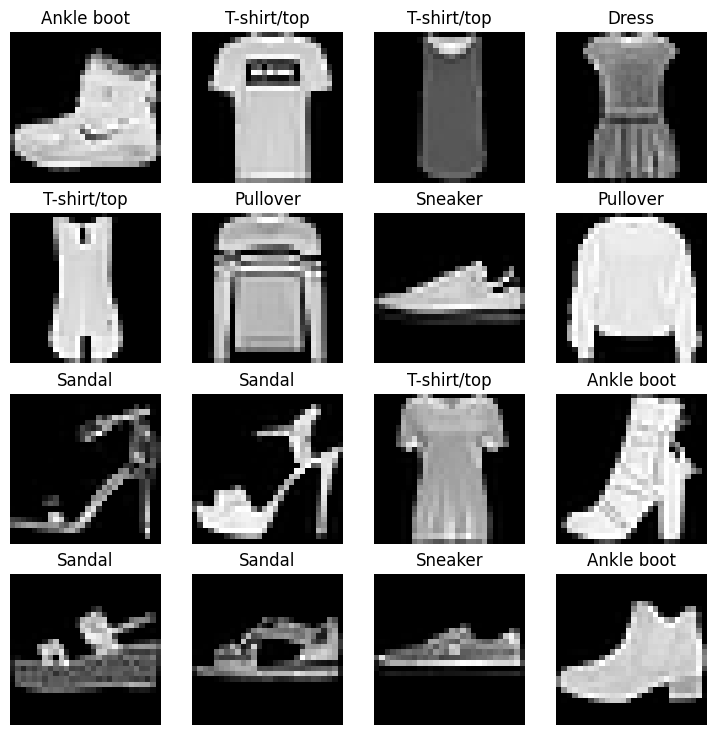

In [3]:
image, label = train_data[0]
print(image.shape, label)

fig = plt.figure(figsize = (9, 9))
for i in range(16):
  fig.add_subplot(4, 4, i + 1)
  image, label = train_data[i]
  plt.imshow(image.squeeze(), cmap = 'gray')
  plt.axis(False)
  plt.title(train_data.classes[label])

create batches

In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data, shuffle = True, batch_size = 32)

test_dataloader = DataLoader(dataset = test_data, shuffle = False, batch_size = 32)

len(test_dataloader), len(train_dataloader)

(313, 1875)

view a sample of new format

Text(0.5, 1.0, 'Bag')

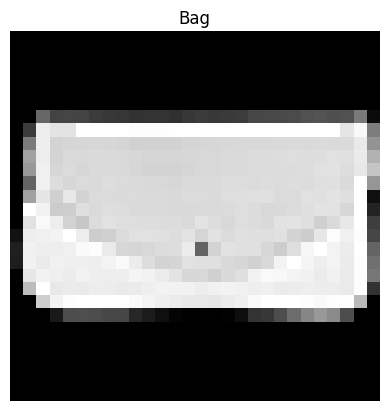

In [5]:
# get the first batch

images_batch, labels_batch = next(iter(train_dataloader))

image, label = images_batch[0], labels_batch[0]

plt.imshow(image.squeeze(), cmap = 'gray')
plt.axis(False)
plt.title(train_data.classes[label])

create the model

In [6]:
model_0 = nn.Sequential(
    # first conv layer
    nn.Conv2d(in_channels = 1, out_channels = 10, kernel_size = 3, stride = 1),
    nn.ReLU(),
    nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, stride = 1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2),

    #second conv layer
    nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, stride = 1),
    nn.ReLU(),
    nn.Conv2d(in_channels = 10, out_channels = 10, kernel_size = 3, stride = 1),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size = 2),

    nn.Flatten(),
    nn.Linear(in_features = 10 * 4 * 4, out_features = 10),
)

train the model

In [7]:
from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr = 0.01)
epcohs = 10
train_accuracy_per_epoch = []
train_losses_per_epoch = []
epochs_array = []

model_0.train()

for epoch in tqdm(range(epcohs)):

  train_loss_epoch = 0
  train_accuracy_epoch = 0
  for batch_images, batch_labels in train_dataloader:

    y_train_preds = model_0(batch_images)

    loss_batch = loss_fn(y_train_preds, batch_labels)
    train_loss_epoch += loss_batch
    accuracy_batch = accuracy_score(batch_labels, torch.argmax(torch.softmax(y_train_preds, axis = 1), axis = 1)) * 100
    train_accuracy_epoch += accuracy_batch

    optimizer.zero_grad()

    loss_batch.backward()

    optimizer.step()

  train_accuracy_per_epoch.append(train_accuracy_epoch / len(train_dataloader))
  train_losses_per_epoch.append(train_loss_epoch / len(train_dataloader))
  epochs_array.append(epoch)



  0%|          | 0/10 [00:00<?, ?it/s]

visualise loss and accuracy in train data

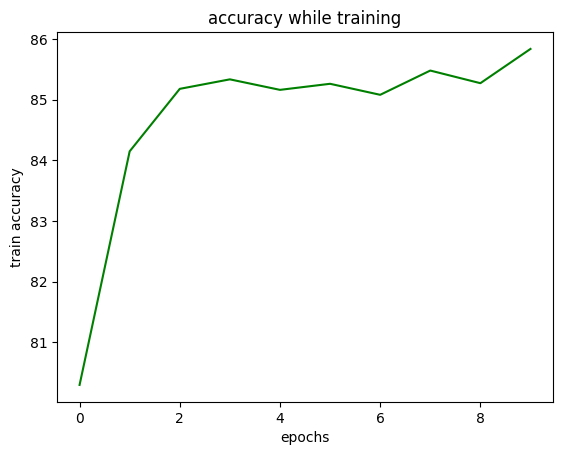

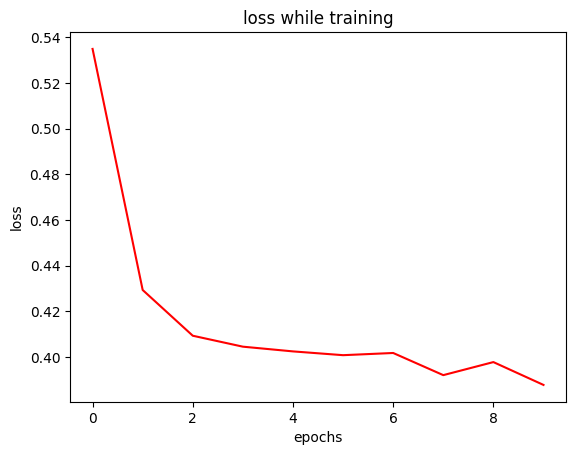

In [14]:
train_losses_per_epoch = [i.detach().numpy() for i in train_losses_per_epoch]
plt.plot(epochs_array, train_accuracy_per_epoch, color = 'g')
plt.xlabel('epochs')
plt.ylabel('train accuracy')
plt.title('accuracy while training')
plt.show()

plt.plot(epochs_array, train_losses_per_epoch, color = 'r')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('loss while training')
plt.show()

make predictions

In [15]:
test_accuracy = 0
test_loss = 0

model_0.eval()
with torch.inference_mode():

  for images_batch, labels_batch in test_dataloader:

    y_test_preds = model_0(images_batch)
    test_loss += loss_fn(y_test_preds, labels_batch)
    test_accuracy += accuracy_score(labels_batch, torch.argmax(torch.softmax(y_test_preds, axis = 1), axis = 1)) * 100

test_accuracy = test_accuracy / len(test_dataloader)
test_loss = test_loss / len(test_dataloader)
test_accuracy, test_loss

(85.6729233226837, tensor(0.3957))